## Introduction

Los Angeles and San Francisco are two of the most significant metropolitan cities in the state of California. The two cities cater to the extensive needs for residents, tourists, business travelers, and entrepreneurs in one of the most thriving states in the country. With the varied culinary tastes of the cities' residents and visitors, it would be beneficial for diners and potential restauranteurs to know: what are the most enjoyable types of cuisines in each city? What factors contribute to the appeal of each of the cities’ restaurants? Does Los Angeles share similar characteristics to San Francisco in culinary tastes? These components are essential for a great dining experience, and for potential restaurant owners to know where to open new venues so their ventures are lucrative.

## Data

The restaurant venue data is sourced from the Foursquare API. Location data that will be used to identify food category venues, in datasets for San Francisco and Los Angeles are:

Features:

* Venue name
* Search criteria that identifies venue cuisine type
* Venue's unique Foursquare identifier
* City of venue's location
* Venue's latitude coordinate
* Venue's longitude coordinate
* Venue's zip code
* Total number of like recorded by users for the venue
* Venue's rating (graded on a floating scale from 0 to 10)
* Venue's price tier (1 = least pricey to 4 = most pricey)

Utilizing the Foursquare API calls, data is collected in a structured, tabular form, maintaining a maximum of 50 records for each search criteria term for the cuisine type. Distinct search criteria are derived from the popular ethnic cuisines documented on yelp.com for the two cities.

# Import Libraries

In [1]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML
import matplotlib.pyplot as plt
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# libraries for linear and polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

   

## Define Foursquare Credentials

In [22]:
CLIENT_ID = '4SJVLFK4JIS2LWR4LHQVWRGX2SWD3HHKSNPW0TTMUET2XO1V'
CLIENT_SECRET = 'WEC5NWP541CBC2SFETNU53X2QVZPZQ4KAXV1J3CPKKBWUMIM'
VERSION = '20190201'

## Set Foursquare Venue type category and Locations for San Francisco and Los Angeles

In [3]:
CATEGORY = '4d4b7105d754a06374d81259'
Location_1 = "San Francisco, CA"
Location_2 = "Los Angeles, CA"
LIMIT = 50

## Set Cuisine types for search criteria

In [4]:
CuisineTypes = ['Indian', 'Chinese', 'Italian', 'Japanese', 'Mexican', 'Thai', 'Korean', 'Middle Eastern', 'Peruvian', 'Vietnamese', 'Mongolian', 'Cambodian', 'Mediterranean', 'Indonesian', 'Ethiopian', 'Cuban']

## Retrieve Foursquare venue data for San Francisco vicinity

In [5]:
SF_Cuisine = pd.DataFrame()
for search_query in CuisineTypes:
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&near={}&categoryId={}&v={}&query={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, Location_1, CATEGORY, VERSION, search_query, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    df = json_normalize(venues)
    df = df[['name', 'categories', 'id', 'location.city', 'location.lat', 'location.lng', 'location.postalCode']]
    df = df.rename(columns={'categories': 'type', 'location.city': 'city', 'location.lat': 'latitude', 'location.lng': 'longitude', 'location.postalCode': 'zipcode'})
    df['type'] = search_query
    SF_Cuisine = SF_Cuisine.append(df)
    
SF_Cuisine.reset_index(drop = True, inplace = True)
SF_Cuisine

,name,type,id,city,latitude,longitude,zipcode
0,Indian Oven,Indian,42893400f964a5204d231fe3,San Francisco,37.771690,-122.430401,94117
1,Kasa Indian Eatery,Indian,49ecf1def964a520b3671fe3,San Francisco,37.761044,-122.432931,94114
2,Pakwan Indian Restaurant,Indian,4a9323a3f964a520ea1e20e3,San Francisco,37.785752,-122.412945,94102
3,Kennedy's Irish Pub & Indian Curry House,Indian,40dcbc80f964a52084011fe3,San Francisco,37.804021,-122.415425,94133
4,Curry Inc. - Indian Palace,Indian,58ed48c4ce66aa59a771a110,San Francisco,37.762521,-122.419678,94110
5,Indian Aroma,Indian,4aa6aaebf964a520954a20e3,San Francisco,37.792163,-122.421051,94109
6,Indian Paradox,Indian,56c66e32498e2e5e0f570db4,San Francisco,37.771580,-122.436919,94117
7,Tara Indian Cuisine,Indian,5657e5d0498e3b242ea9ffad,San Francisco,37.765459,-122.431484,NaN
8,Roti Indian Bistro,Indian,49fa41c3f964a520e16d1fe3,San Francisco,37.740273,-122.466342,94127
9,Kasa Indian Eatery,Indian,51c65d4b498e793c43082733,San Francisco,37.789655,-122.420449,94109


## Drop from dataframe venues not located in San Francisco

In [6]:
SF_Cuisine = SF_Cuisine[SF_Cuisine.city == 'San Francisco'].reset_index(drop = True)
SF_Cuisine

,name,type,id,city,latitude,longitude,zipcode
0,Indian Oven,Indian,42893400f964a5204d231fe3,San Francisco,37.771690,-122.430401,94117
1,Kasa Indian Eatery,Indian,49ecf1def964a520b3671fe3,San Francisco,37.761044,-122.432931,94114
2,Pakwan Indian Restaurant,Indian,4a9323a3f964a520ea1e20e3,San Francisco,37.785752,-122.412945,94102
3,Kennedy's Irish Pub & Indian Curry House,Indian,40dcbc80f964a52084011fe3,San Francisco,37.804021,-122.415425,94133
4,Curry Inc. - Indian Palace,Indian,58ed48c4ce66aa59a771a110,San Francisco,37.762521,-122.419678,94110
5,Indian Aroma,Indian,4aa6aaebf964a520954a20e3,San Francisco,37.792163,-122.421051,94109
6,Indian Paradox,Indian,56c66e32498e2e5e0f570db4,San Francisco,37.771580,-122.436919,94117
7,Tara Indian Cuisine,Indian,5657e5d0498e3b242ea9ffad,San Francisco,37.765459,-122.431484,NaN
8,Roti Indian Bistro,Indian,49fa41c3f964a520e16d1fe3,San Francisco,37.740273,-122.466342,94127
9,Kasa Indian Eatery,Indian,51c65d4b498e793c43082733,San Francisco,37.789655,-122.420449,94109


## Plot venue data on map

In [7]:
# San Francisco latitude and longitude values
SF_Lat = 37.77
SF_Lng = -122.42

# create map
SF_Map = folium.Map(location=[SF_Lat, SF_Lng], zoom_start = 12)

venues = folium.map.FeatureGroup()

# loop through all venues and add each to the feature group
for lat, lng, in zip(SF_Cuisine.latitude, SF_Cuisine.longitude):
    venues.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    ).add_to(SF_Map)

SF_Map

## Get the number of likes, rating, and price tier for each venue

In [8]:
SF_Cuisine['likes'] = ''
SF_Cuisine['rating'] = ''
SF_Cuisine['price_tier'] = ''
for index, venue in SF_Cuisine.iterrows():
    url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(venue['id'], CLIENT_ID, CLIENT_SECRET, VERSION)
    results = requests.get(url).json()
    SF_Cuisine.loc[index, 'likes'] = results['response']['likes']['count']
    url_rating_price = 'https://api.foursquare.com/v2/venues/{}/?client_id={}&client_secret={}&v={}'.format(venue['id'], CLIENT_ID, CLIENT_SECRET, VERSION)
    results_rating_price = requests.get(url_rating_price).json()
    try:
        SF_Cuisine.loc[index, 'rating'] = results_rating_price['response']['venue']['rating']
    except KeyError:
        SF_Cuisine.loc[index, 'rating'] = 'NaN'         
    try:
        SF_Cuisine.loc[index, 'price_tier'] = results_rating_price['response']['venue']['price']['tier']
    except KeyError:
        SF_Cuisine.loc[index, 'price_tier'] = 'NaN'
    
SF_Cuisine

,name,type,id,city,latitude,longitude,zipcode,likes,rating,price_tier
0,Indian Oven,Indian,42893400f964a5204d231fe3,San Francisco,37.771690,-122.430401,94117,40,6.2,2
1,Kasa Indian Eatery,Indian,49ecf1def964a520b3671fe3,San Francisco,37.761044,-122.432931,94114,187,8.1,2
2,Pakwan Indian Restaurant,Indian,4a9323a3f964a520ea1e20e3,San Francisco,37.785752,-122.412945,94102,51,7.3,1
3,Kennedy's Irish Pub & Indian Curry House,Indian,40dcbc80f964a52084011fe3,San Francisco,37.804021,-122.415425,94133,182,7.1,2
4,Curry Inc. - Indian Palace,Indian,58ed48c4ce66aa59a771a110,San Francisco,37.762521,-122.419678,94110,1,NaN,2
5,Indian Aroma,Indian,4aa6aaebf964a520954a20e3,San Francisco,37.792163,-122.421051,94109,0,NaN,2
6,Indian Paradox,Indian,56c66e32498e2e5e0f570db4,San Francisco,37.771580,-122.436919,94117,74,8.7,2
7,Tara Indian Cuisine,Indian,5657e5d0498e3b242ea9ffad,San Francisco,37.765459,-122.431484,NaN,32,7.4,2
8,Roti Indian Bistro,Indian,49fa41c3f964a520e16d1fe3,San Francisco,37.740273,-122.466342,94127,66,8.6,2
9,Kasa Indian Eatery,Indian,51c65d4b498e793c43082733,San Francisco,37.789655,-122.420449,94109,66,6.8,2


## Remove data with missing values in zipcode, rating, and price_tier

In [9]:
SF_Cuisine = SF_Cuisine[SF_Cuisine['rating'] != 'NaN']
SF_Cuisine = SF_Cuisine[SF_Cuisine['price_tier'] != 'NaN']
SF_Cuisine.dropna(axis=0, subset=['zipcode'], inplace = True)
SF_Cuisine.reset_index(drop = True, inplace = True)
SF_Cuisine.head(15)

,name,type,id,city,latitude,longitude,zipcode,likes,rating,price_tier
0,Indian Oven,Indian,42893400f964a5204d231fe3,San Francisco,37.771690,-122.430401,94117,40,6.2,2
1,Kasa Indian Eatery,Indian,49ecf1def964a520b3671fe3,San Francisco,37.761044,-122.432931,94114,187,8.1,2
2,Pakwan Indian Restaurant,Indian,4a9323a3f964a520ea1e20e3,San Francisco,37.785752,-122.412945,94102,51,7.3,1
3,Kennedy's Irish Pub & Indian Curry House,Indian,40dcbc80f964a52084011fe3,San Francisco,37.804021,-122.415425,94133,182,7.1,2
4,Indian Paradox,Indian,56c66e32498e2e5e0f570db4,San Francisco,37.771580,-122.436919,94117,74,8.7,2
5,Roti Indian Bistro,Indian,49fa41c3f964a520e16d1fe3,San Francisco,37.740273,-122.466342,94127,66,8.6,2
6,Kasa Indian Eatery,Indian,51c65d4b498e793c43082733,San Francisco,37.789655,-122.420449,94109,66,6.8,2
7,Royal Indian Cuisine,Indian,58e3b8319343e0638517e95c,San Francisco,37.785822,-122.433134,94115,19,7.7,2
8,Lotus SF Indian Cuisine,Indian,5a56d8294b78c509a7e462e7,San Francisco,37.757996,-122.419039,94110,16,7,2
9,Ritu Indian Soul Food,Indian,5b21c973791871002c157bb5,San Francisco,37.752370,-122.414479,94110,6,7.8,2


## Encode Cuisine Type as categorical

In [10]:
SF_Cuisine['type'] = SF_Cuisine['type'].astype('category')
SF_Cuisine['type_cat'] = SF_Cuisine['type'].cat.codes
SF_Cuisine.reset_index(drop = True, inplace = True)
SF_Cuisine.head(15)

,name,type,id,city,latitude,longitude,zipcode,likes,rating,price_tier,type_cat
0,Indian Oven,Indian,42893400f964a5204d231fe3,San Francisco,37.771690,-122.430401,94117,40,6.2,2,3
1,Kasa Indian Eatery,Indian,49ecf1def964a520b3671fe3,San Francisco,37.761044,-122.432931,94114,187,8.1,2,3
2,Pakwan Indian Restaurant,Indian,4a9323a3f964a520ea1e20e3,San Francisco,37.785752,-122.412945,94102,51,7.3,1,3
3,Kennedy's Irish Pub & Indian Curry House,Indian,40dcbc80f964a52084011fe3,San Francisco,37.804021,-122.415425,94133,182,7.1,2,3
4,Indian Paradox,Indian,56c66e32498e2e5e0f570db4,San Francisco,37.771580,-122.436919,94117,74,8.7,2,3
5,Roti Indian Bistro,Indian,49fa41c3f964a520e16d1fe3,San Francisco,37.740273,-122.466342,94127,66,8.6,2,3
6,Kasa Indian Eatery,Indian,51c65d4b498e793c43082733,San Francisco,37.789655,-122.420449,94109,66,6.8,2,3
7,Royal Indian Cuisine,Indian,58e3b8319343e0638517e95c,San Francisco,37.785822,-122.433134,94115,19,7.7,2,3
8,Lotus SF Indian Cuisine,Indian,5a56d8294b78c509a7e462e7,San Francisco,37.757996,-122.419039,94110,16,7,2,3
9,Ritu Indian Soul Food,Indian,5b21c973791871002c157bb5,San Francisco,37.752370,-122.414479,94110,6,7.8,2,3


## Convert numerical variables to int and float

In [11]:
SF_Cuisine[['zipcode']] = np.int64(SF_Cuisine[['zipcode']])
SF_Cuisine[['price_tier']] = np.int64(SF_Cuisine[['price_tier']])
SF_Cuisine[['rating']] = np.float64(SF_Cuisine[['rating']])                                     

## Examine correlation of variables

In [12]:
SF_Cuisine[['type_cat', 'zipcode', 'rating', 'price_tier', 'likes']].corr()

,type_cat,zipcode,rating,price_tier,likes
type_cat,1.000000,-0.207785,0.113514,-0.218993,0.010402
zipcode,-0.207785,1.000000,-0.009801,0.105350,-0.158288
rating,0.113514,-0.009801,1.000000,0.175463,0.524607
price_tier,-0.218993,0.105350,0.175463,1.000000,0.109196
likes,0.010402,-0.158288,0.524607,0.109196,1.000000


## Perform Simple Linear Regression to predict # of Likes from the cuisine type

The R-square is:  0.000108211807773
The mean square error of # of likes and predicted value is:  28670.8825173


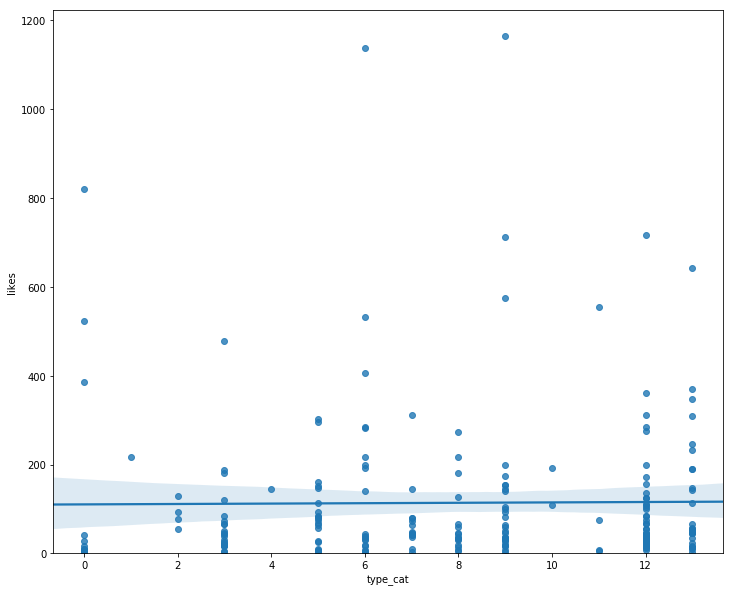

In [13]:
import seaborn as sns
%matplotlib inline 
x_data = SF_Cuisine[['type_cat']]
y_data = SF_Cuisine[['likes']]
lr = LinearRegression()
lr.fit(x_data, y_data)
yhat = lr.predict(x_data)

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="type_cat", y="likes", data=SF_Cuisine)
plt.ylim(0,)

print('The R-square is: ', lr.score(x_data, y_data))
print('The mean square error of # of likes and predicted value is: ', mean_squared_error(y_data, yhat))

## Perform Multiple Linear Regression to predict # of Likes from the cuisine type, price_tier, and zip code

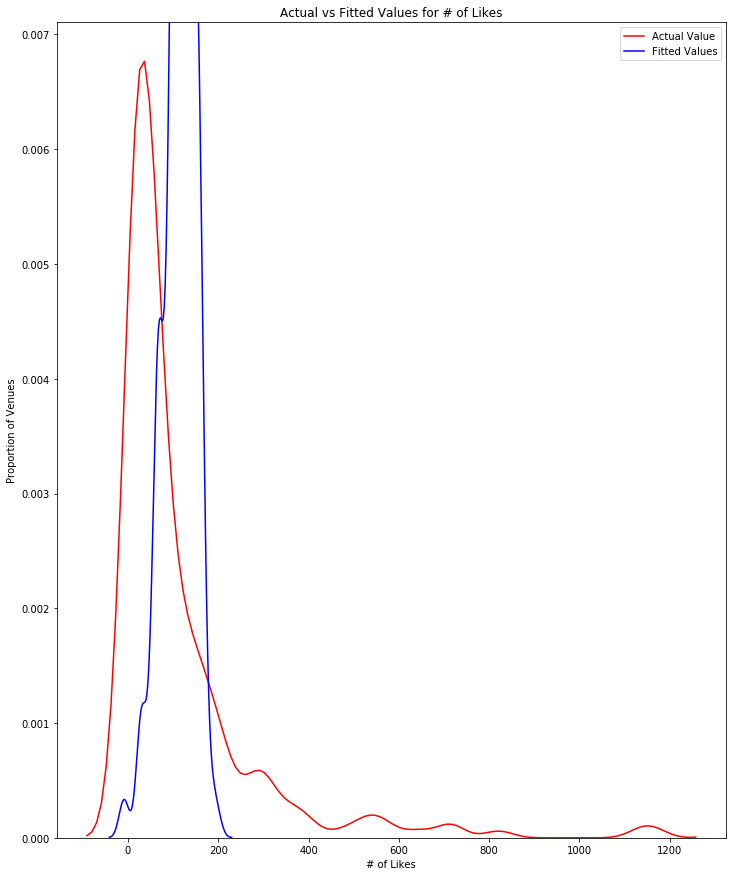

The R-square is:  0.0410841174926
The mean square error of # of likes and predicted value is:  27495.9399968


In [14]:
Z = SF_Cuisine[['type_cat', 'price_tier', 'zipcode']]
y_data = SF_Cuisine[['likes']]
lr = LinearRegression()
lr.fit(Z, y_data)
y_predict_multifit = lr.predict(Z)

width = 12
height = 15
plt.figure(figsize=(width, height))
ax1 = sns.distplot(y_data, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict_multifit, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for # of Likes')
plt.xlabel('# of Likes')
plt.ylabel('Proportion of Venues')

plt.show()
plt.close()

print('The R-square is: ', lr.score(Z, y_data))
print('The mean square error of # of likes and predicted value is: ', mean_squared_error(y_data, y_predict_multifit))

## Perform Multivariate Polynomial Regression to predict # of Likes from the cuisine type, price_tier, and zip code

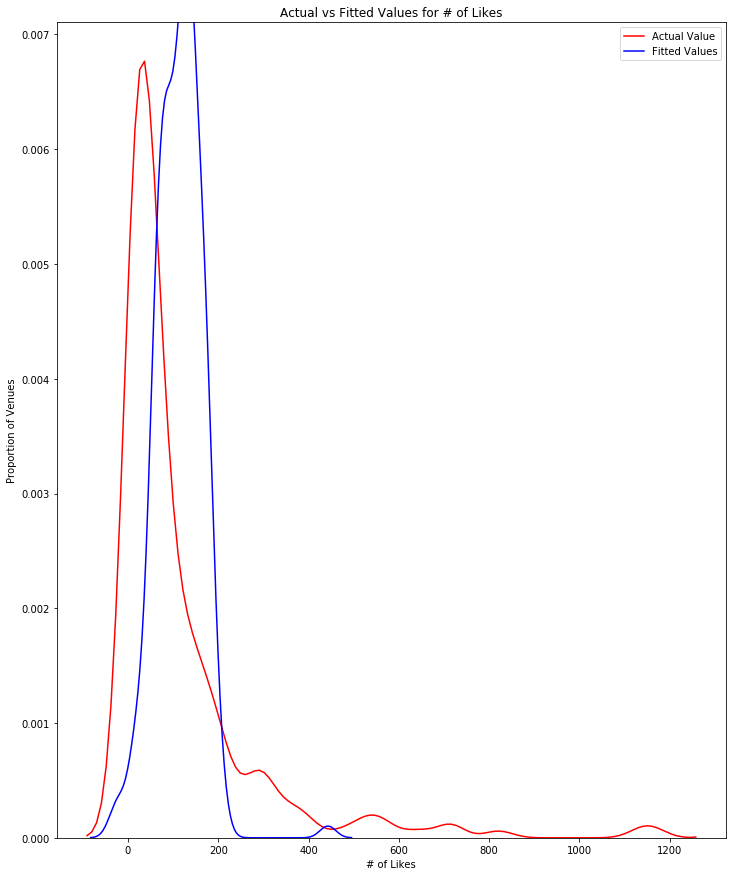

The R-square is:  0.0894506597658
The mean square error of # of likes and predicted value is:  26109.0784707


In [15]:
Z = SF_Cuisine[['type_cat', 'price_tier', 'zipcode']]
y_data = SF_Cuisine[['likes']]

# Polynomial Regression of the 4th order
pr = PolynomialFeatures(degree = 4)
Z_pr = pr.fit_transform(Z)
lr = LinearRegression()
lr.fit(Z_pr, y_data)
y_poly_pred = lr.predict(Z_pr)

width = 12
height = 15
plt.figure(figsize=(width, height))
ax1 = sns.distplot(y_data, hist=False, color="r", label="Actual Value")
sns.distplot(y_poly_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for # of Likes')
plt.xlabel('# of Likes')
plt.ylabel('Proportion of Venues')

plt.show()
plt.close()

print('The R-square is: ', r2_score(y_data,y_poly_pred))
print('The mean square error of # of likes and predicted value is: ', mean_squared_error(y_data, y_poly_pred))

## Decision Tree classification

In [17]:
X = SF_Cuisine[['type_cat', 'price_tier', 'zipcode']].values
Y = SF_Cuisine[['likes']]

from sklearn import metrics

# Create training and testing sets with 80% / 20% split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(X_train, Y_train)
Pred = Tree.predict(X_test)
print("Decision Trees's Accuracy: ", metrics.accuracy_score(Y_test, Pred))

Decision Trees's Accuracy:  0.0222222222222


## Examine aggregates of SF Cuisine types

In [18]:
dict = {'likes': ['count', 'mean'], 'price_tier': ['mean']}
SF_Cuisine.groupby('type').agg(dict)

likes             price_tier
               count        mean       mean
type                                       
Chinese           14  133.357143   1.714286
Cuban              1  218.000000   2.000000
Ethiopian          4   88.500000   1.750000
Indian            22   73.681818   1.909091
Indonesian         1  145.000000   2.000000
Italian           21   88.809524   2.095238
Japanese          19  190.789474   1.947368
Korean            14   73.357143   2.000000
Mediterranean     16   74.375000   1.687500
Mexican           29  148.724138   1.310345
Middle Eastern     2  150.500000   1.500000
Peruvian           4  161.250000   1.750000
Thai              46   96.891304   1.826087
Vietnamese        28  126.142857   1.321429

## Retrieve Foursquare venue data for Los Angeles vicinity

In [19]:
LA_Cuisine = pd.DataFrame()
for search_query in CuisineTypes:
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&near={}&categoryId={}&v={}&query={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, Location_2, CATEGORY, VERSION, search_query, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    df = json_normalize(venues)
    df = df[['name', 'categories', 'id', 'location.city', 'location.lat', 'location.lng', 'location.postalCode']]
    df = df.rename(columns={'categories': 'type', 'location.city': 'city', 'location.lat': 'latitude', 'location.lng': 'longitude', 'location.postalCode': 'zipcode'})
    df['type'] = search_query
    LA_Cuisine = LA_Cuisine.append(df)
    
LA_Cuisine.reset_index(drop = True, inplace = True)
LA_Cuisine

,name,type,id,city,latitude,longitude,zipcode
0,Gill’s Indian Restaurant| ORDER FOOD ONLINE,Indian,4f3235c319836c91c7c0fef7,Los Angeles,34.044647,-118.258433,90017
1,Spice Affair Beverly Hills Indian Restaurant,Indian,50b803ace4b036209ce29a5d,Beverly Hills,34.066928,-118.375966,90211
2,Manas Indian Cuisine,Indian,4b528cb3f964a520ec8127e3,Los Angeles,34.028826,-118.291656,90007
3,"India's Tandoori-Authentic Indian Cuisine, Hal...",Indian,4b563ca5f964a520ca0628e3,Los Angeles,34.062251,-118.347645,90036
4,The Indian Kitchen,Indian,4e73e7f2ae60c3285070d4ba,West Hollywood,34.090861,-118.367055,90046
5,Mayura Indian Restaurant,Indian,4b130710f964a520ee9223e3,Culver City,34.019962,-118.404037,90232
6,The Indian Cafe,Indian,58ff91c7f193c07ced04b301,Los Angeles,34.044679,-118.258415,90017
7,Little Indian Cuisine,Indian,4f32387619836c91c7c2068f,Los Angeles,34.047774,-118.254383,90014
8,Clay Oven Indian Restaurant,Indian,4af22b13f964a5204be621e3,Sherman Oaks,34.151430,-118.451408,91403
9,Mandovi Indian Cuisine,Indian,53c82ed4498ec426554d443a,El Segundo,33.914634,-118.395547,90245


## Drop from dataframe venues not located in Los Angeles

In [20]:
LA_Cuisine = LA_Cuisine[LA_Cuisine.city == 'Los Angeles'].reset_index(drop = True)
LA_Cuisine

,name,type,id,city,latitude,longitude,zipcode
0,Gill’s Indian Restaurant| ORDER FOOD ONLINE,Indian,4f3235c319836c91c7c0fef7,Los Angeles,34.044647,-118.258433,90017
1,Manas Indian Cuisine,Indian,4b528cb3f964a520ec8127e3,Los Angeles,34.028826,-118.291656,90007
2,"India's Tandoori-Authentic Indian Cuisine, Hal...",Indian,4b563ca5f964a520ca0628e3,Los Angeles,34.062251,-118.347645,90036
3,The Indian Cafe,Indian,58ff91c7f193c07ced04b301,Los Angeles,34.044679,-118.258415,90017
4,Little Indian Cuisine,Indian,4f32387619836c91c7c2068f,Los Angeles,34.047774,-118.254383,90014
5,Golden Indian Grill,Indian,4bc38523b492d13a64dea860,Los Angeles,34.051769,-118.369458,90035
6,Amardesh Indian Cuisine,Indian,57eb831c498edeb7a788b3cf,Los Angeles,34.052698,-118.283843,90006
7,No Tomatoes! an Indian café,Indian,4e7e40915c5cd809cf5b7014,Los Angeles,34.073398,-118.376850,90048
8,Korea/indian Market,Indian,4e84ff247ee6763749960968,Los Angeles,34.061341,-118.278782,NaN
9,Anarkali Indian Restaurant,Indian,49c48d90f964a520ce561fe3,Los Angeles,34.083551,-118.343263,90038


## Plot venue data on map

In [21]:
# Los Angeles latitude and longitude values
LA_Lat = 34.05
LA_Lng = -118.24

# create map
LA_Map = folium.Map(location=[LA_Lat, LA_Lng], zoom_start = 11)

venues = folium.map.FeatureGroup()

# loop through all venues and add each to the feature group
for lat, lng, in zip(LA_Cuisine.latitude, LA_Cuisine.longitude):
    venues.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    ).add_to(LA_Map)

LA_Map

## Get the number of likes, rating, and price tier for each venue

In [23]:
LA_Cuisine['likes'] = ''
LA_Cuisine['rating'] = ''
LA_Cuisine['price_tier'] = ''
for index, venue in LA_Cuisine.iterrows():
    url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(venue['id'], CLIENT_ID, CLIENT_SECRET, VERSION)
    results = requests.get(url).json()
    LA_Cuisine.loc[index, 'likes'] = results['response']['likes']['count']
    url_rating_price = 'https://api.foursquare.com/v2/venues/{}/?client_id={}&client_secret={}&v={}'.format(venue['id'], CLIENT_ID, CLIENT_SECRET, VERSION)
    results_rating_price = requests.get(url_rating_price).json()
    try:
        LA_Cuisine.loc[index, 'rating'] = results_rating_price['response']['venue']['rating']
    except KeyError:
        LA_Cuisine.loc[index, 'rating'] = 'NaN'         
    try:
        LA_Cuisine.loc[index, 'price_tier'] = results_rating_price['response']['venue']['price']['tier']
    except KeyError:
        LA_Cuisine.loc[index, 'price_tier'] = 'NaN'
    
LA_Cuisine

,name,type,id,city,latitude,longitude,zipcode,likes,rating,price_tier
0,Gill’s Indian Restaurant| ORDER FOOD ONLINE,Indian,4f3235c319836c91c7c0fef7,Los Angeles,34.044647,-118.258433,90017,0,NaN,1
1,Manas Indian Cuisine,Indian,4b528cb3f964a520ec8127e3,Los Angeles,34.028826,-118.291656,90007,32,6.7,1
2,"India's Tandoori-Authentic Indian Cuisine, Hal...",Indian,4b563ca5f964a520ca0628e3,Los Angeles,34.062251,-118.347645,90036,20,7.4,2
3,The Indian Cafe,Indian,58ff91c7f193c07ced04b301,Los Angeles,34.044679,-118.258415,90017,0,NaN,2
4,Little Indian Cuisine,Indian,4f32387619836c91c7c2068f,Los Angeles,34.047774,-118.254383,90014,0,NaN,2
5,Golden Indian Grill,Indian,4bc38523b492d13a64dea860,Los Angeles,34.051769,-118.369458,90035,2,NaN,2
6,Amardesh Indian Cuisine,Indian,57eb831c498edeb7a788b3cf,Los Angeles,34.052698,-118.283843,90006,0,NaN,NaN
7,No Tomatoes! an Indian café,Indian,4e7e40915c5cd809cf5b7014,Los Angeles,34.073398,-118.376850,90048,3,5.9,2
8,Korea/indian Market,Indian,4e84ff247ee6763749960968,Los Angeles,34.061341,-118.278782,NaN,0,NaN,NaN
9,Anarkali Indian Restaurant,Indian,49c48d90f964a520ce561fe3,Los Angeles,34.083551,-118.343263,90038,32,7.2,2


## Remove data with missing values in zipcode, rating, and price_tier

In [24]:
LA_Cuisine = LA_Cuisine[LA_Cuisine['rating'] != 'NaN']
LA_Cuisine = LA_Cuisine[LA_Cuisine['price_tier'] != 'NaN']
LA_Cuisine.dropna(axis=0, subset=['zipcode'], inplace = True)
LA_Cuisine.reset_index(drop = True, inplace = True)
LA_Cuisine.head(15)

,name,type,id,city,latitude,longitude,zipcode,likes,rating,price_tier
0,Manas Indian Cuisine,Indian,4b528cb3f964a520ec8127e3,Los Angeles,34.028826,-118.291656,90007,32,6.7,1
1,"India's Tandoori-Authentic Indian Cuisine, Hal...",Indian,4b563ca5f964a520ca0628e3,Los Angeles,34.062251,-118.347645,90036,20,7.4,2
2,No Tomatoes! an Indian café,Indian,4e7e40915c5cd809cf5b7014,Los Angeles,34.073398,-118.376850,90048,3,5.9,2
3,Anarkali Indian Restaurant,Indian,49c48d90f964a520ce561fe3,Los Angeles,34.083551,-118.343263,90038,32,7.2,2
4,Anar Indian Restaurant,Indian,515488f9e4b00a6313dbbe75,Los Angeles,34.104152,-118.330300,90028,13,6.9,1
5,Hurry Curry Indian Food,Indian,4b4fe7acf964a520311927e3,Los Angeles,34.000054,-118.441280,90066,12,6.2,1
6,Chinese Friends Restaurant,Chinese,4b94626cf964a5203a7734e3,Los Angeles,34.066544,-118.235991,90012,16,7.3,1
7,Phoenix Inn Chinese Cuisine,Chinese,4b061536f964a52069e822e3,Los Angeles,34.060129,-118.238735,90012,33,7.7,1
8,Qin West Chinese Cuisine,Chinese,54f3890f498ed9a991bfa0a0,Los Angeles,34.061375,-118.239398,90012,6,6.1,1
9,Shin Beijing Chinese Cuisine,Chinese,4b66410af964a520e01a2be3,Los Angeles,34.052814,-118.303282,90006,7,5.9,2


## Encode Cuisine Type as categorical

In [25]:
LA_Cuisine['type'] = LA_Cuisine['type'].astype('category')
LA_Cuisine['type_cat'] = LA_Cuisine['type'].cat.codes
LA_Cuisine.reset_index(drop = True, inplace = True)
LA_Cuisine.head(15)

,name,type,id,city,latitude,longitude,zipcode,likes,rating,price_tier,type_cat
0,Manas Indian Cuisine,Indian,4b528cb3f964a520ec8127e3,Los Angeles,34.028826,-118.291656,90007,32,6.7,1,3
1,"India's Tandoori-Authentic Indian Cuisine, Hal...",Indian,4b563ca5f964a520ca0628e3,Los Angeles,34.062251,-118.347645,90036,20,7.4,2,3
2,No Tomatoes! an Indian café,Indian,4e7e40915c5cd809cf5b7014,Los Angeles,34.073398,-118.376850,90048,3,5.9,2,3
3,Anarkali Indian Restaurant,Indian,49c48d90f964a520ce561fe3,Los Angeles,34.083551,-118.343263,90038,32,7.2,2,3
4,Anar Indian Restaurant,Indian,515488f9e4b00a6313dbbe75,Los Angeles,34.104152,-118.330300,90028,13,6.9,1,3
5,Hurry Curry Indian Food,Indian,4b4fe7acf964a520311927e3,Los Angeles,34.000054,-118.441280,90066,12,6.2,1,3
6,Chinese Friends Restaurant,Chinese,4b94626cf964a5203a7734e3,Los Angeles,34.066544,-118.235991,90012,16,7.3,1,0
7,Phoenix Inn Chinese Cuisine,Chinese,4b061536f964a52069e822e3,Los Angeles,34.060129,-118.238735,90012,33,7.7,1,0
8,Qin West Chinese Cuisine,Chinese,54f3890f498ed9a991bfa0a0,Los Angeles,34.061375,-118.239398,90012,6,6.1,1,0
9,Shin Beijing Chinese Cuisine,Chinese,4b66410af964a520e01a2be3,Los Angeles,34.052814,-118.303282,90006,7,5.9,2,0


## Convert numerical variables to int and float

In [26]:
LA_Cuisine[['zipcode']] = np.int64(LA_Cuisine[['zipcode']])
LA_Cuisine[['price_tier']] = np.int64(LA_Cuisine[['price_tier']])
LA_Cuisine[['rating']] = np.float64(LA_Cuisine[['rating']])

## Examine correlation of variables

In [27]:
LA_Cuisine[['type_cat', 'zipcode', 'rating', 'price_tier', 'likes']].corr()

,type_cat,zipcode,rating,price_tier,likes
type_cat,1.000000,0.012061,0.034609,-0.003766,0.034429
zipcode,0.012061,1.000000,-0.089493,-0.154334,-0.101145
rating,0.034609,-0.089493,1.000000,0.099353,0.556762
price_tier,-0.003766,-0.154334,0.099353,1.000000,0.196802
likes,0.034429,-0.101145,0.556762,0.196802,1.000000


## Perform Simple Linear Regression to predict # of Likes from the cuisine type

The R-square is:  0.00118532746955
The mean square error of # of likes and predicted value is:  3832.54198549


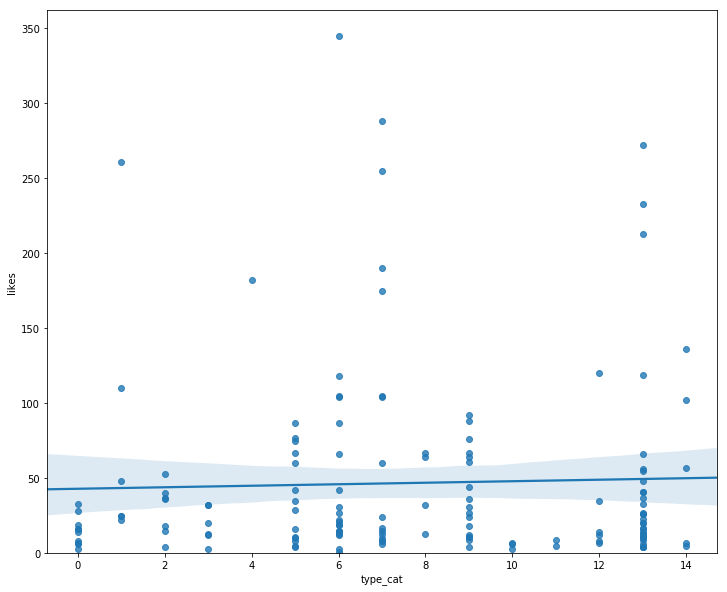

In [28]:
import seaborn as sns
%matplotlib inline 
x_data = LA_Cuisine[['type_cat']]
y_data = LA_Cuisine[['likes']]
lr = LinearRegression()
lr.fit(x_data, y_data)
yhat = lr.predict(x_data)

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="type_cat", y="likes", data=LA_Cuisine)
plt.ylim(0,)

print('The R-square is: ', lr.score(x_data, y_data))
print('The mean square error of # of likes and predicted value is: ', mean_squared_error(y_data, yhat))

## Perform Multiple Linear Regression to predict # of Likes from the cuisine type, price_tier, and zip code

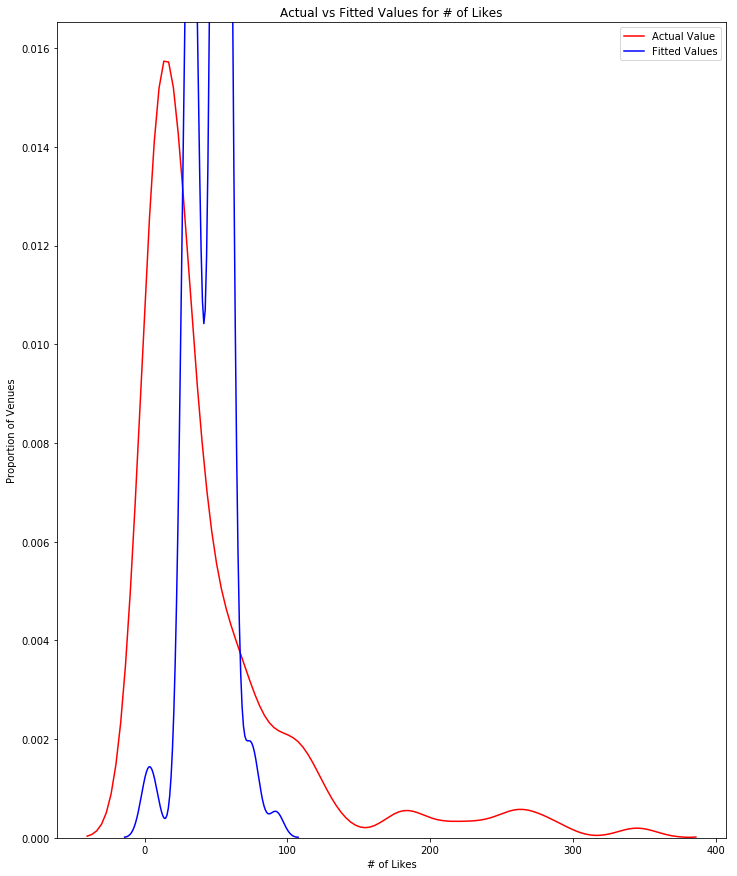

The R-square is:  0.0451582546278
The mean square error of # of likes and predicted value is:  3663.81389789


In [29]:
Z = LA_Cuisine[['type_cat', 'price_tier', 'zipcode']]
y_data = LA_Cuisine[['likes']]
lr = LinearRegression()
lr.fit(Z, y_data)
y_predict_multifit = lr.predict(Z)

width = 12
height = 15
plt.figure(figsize=(width, height))
ax1 = sns.distplot(y_data, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict_multifit, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for # of Likes')
plt.xlabel('# of Likes')
plt.ylabel('Proportion of Venues')

plt.show()
plt.close()

print('The R-square is: ', lr.score(Z, y_data))
print('The mean square error of # of likes and predicted value is: ', mean_squared_error(y_data, y_predict_multifit))

## Perform Multivariate Polynomial Regression to predict # of Likes from the cuisine type, price_tier, and zip code

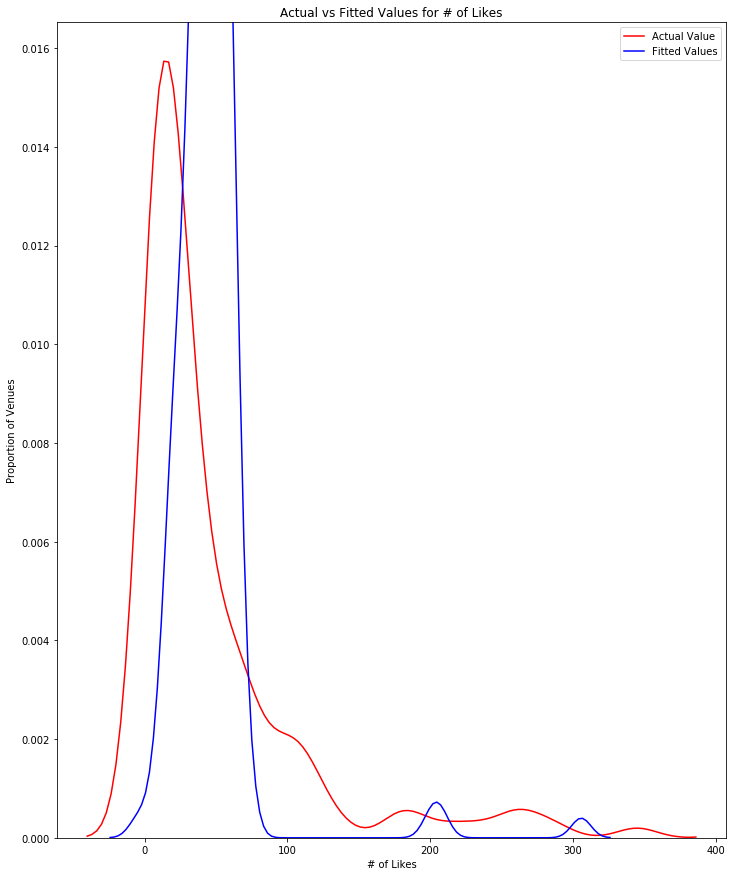

The R-square is:  0.265530539783
The mean square error of # of likes and predicted value is:  2818.22556352


In [30]:
Z = LA_Cuisine[['type_cat', 'price_tier', 'zipcode']]
y_data = LA_Cuisine[['likes']]

# Polynomial Regression of the 4th order
pr = PolynomialFeatures(degree = 4)
Z_pr = pr.fit_transform(Z)
lr = LinearRegression()
lr.fit(Z_pr, y_data)
y_poly_pred = lr.predict(Z_pr)

width = 12
height = 15
plt.figure(figsize=(width, height))
ax1 = sns.distplot(y_data, hist=False, color="r", label="Actual Value")
sns.distplot(y_poly_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for # of Likes')
plt.xlabel('# of Likes')
plt.ylabel('Proportion of Venues')

plt.show()
plt.close()

print('The R-square is: ', r2_score(y_data,y_poly_pred))
print('The mean square error of # of likes and predicted value is: ', mean_squared_error(y_data, y_poly_pred))

## Decision Tree classification

In [31]:
X = LA_Cuisine[['type_cat', 'price_tier', 'zipcode']].values
Y = LA_Cuisine[['likes']]

from sklearn import metrics

# Create training and testing sets with 80% / 20% split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(X_train, Y_train)
Pred = Tree.predict(X_test)
print("Decision Trees's Accuracy: ", metrics.accuracy_score(Y_test, Pred))

Decision Trees's Accuracy:  0.0


## Examine aggregates of LA Cuisine types

In [32]:
dict = {'likes': ['count', 'mean'], 'price_tier': ['mean']}
LA_Cuisine.groupby('type').agg(dict)

likes             price_tier
               count        mean       mean
type                                       
Chinese           10   15.000000   1.600000
Cuban              6   81.833333   1.833333
Ethiopian          7   29.000000   2.000000
Indian             6   18.666667   1.500000
Indonesian         1  182.000000   2.000000
Italian           14   37.571429   1.500000
Japanese          20   53.950000   1.850000
Korean            15   85.200000   2.066667
Mediterranean      4   44.000000   1.750000
Mexican           17   39.705882   1.235294
Middle Eastern     3    5.333333   2.000000
Mongolian          2    7.000000   1.500000
Peruvian           6   32.666667   1.833333
Thai              31   48.000000   1.709677
Vietnamese         5   61.400000   2.000000